In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import voxart

In [3]:
import importlib
importlib.reload(voxart)

<module 'voxart' from '/Users/priley/side_projects/voxart/voxart/__init__.py'>

# XYZ

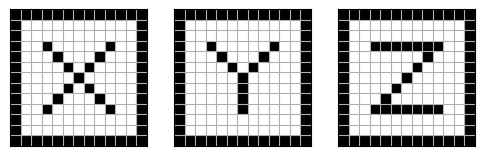

In [4]:
goal_xyz = voxart.Goal.from_image(Image.open("../assets/xyz_13.png"))
goal_xyz.fig()

In [5]:
opts = voxart.SearchOptions()
results_filled, results = voxart.search(goal_xyz, opts)
_, design_xyz = results.best()[0]

SearchOptions(filled_batch_size=3, filled_num_batches=5, filled_strategy='random_clear_front', filled_num_to_pursue=20, connector_num_iterations_per=30, connector_allow_obstructing=False, connector_frac=0.4, top_n=20, obj_func=None)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

In [8]:
df_filled_results = results_filled.all_objective_values()
display(df_filled_results.sample(5))
df_results = results.all_objective_values()
display(df_results.sample(5))

,batch_idx,idx_in_batch,filled_form_idx,filled_is_starting,filled_iteration,filled_is_unique,filled_uid,objective_value,objective_value_rank
86,4,6,10,False,1,False,3,86.5,0
17,0,17,3,False,2,False,4,100.2,60
22,1,2,0,False,0,False,2,86.5,0
84,4,4,2,False,2,False,0,86.5,0
74,3,14,3,False,0,False,4,100.2,60


,batch_idx,idx_in_batch,filled_form_idx,filled_is_starting,filled_iteration,filled_is_unique,filled_uid,idx_in_connector,conn_iteration,conn_num_connectors,conn_failure,idx_in_bottom_location,bottom_location,is_unique,uid,objective_value,objective_value_rank
289,0,6,10,False,1,True,3,0,24,45,False,1,"(0, 0, 0)",True,289,148.6,43
129,0,1,8,False,1,True,1,4,7,47,False,1,"(1, 0, 1)",True,129,150.6,81
401,0,12,3,False,1,True,4,2,29,40,False,1,"(1, 0, 1)",True,401,157.3,369
621,0,15,9,False,0,True,6,5,27,43,False,5,"(1, 0, 1)",True,621,166.0,595
277,0,2,0,False,0,True,2,10,4,47,False,5,"(1, 0, 0)",True,277,160.1,447


In [17]:
df_results["conn_failure"].value_counts()

False    672
Name: conn_failure, dtype: int64

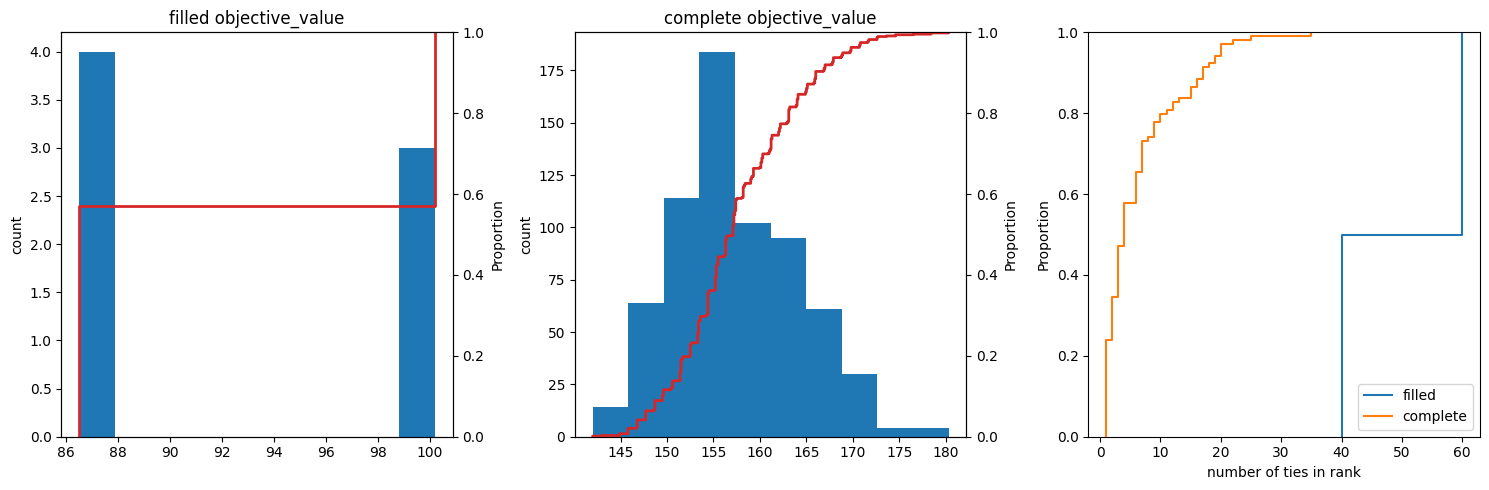

In [9]:
voxart.objective_distributions_plot(df_filled_results, df_results)

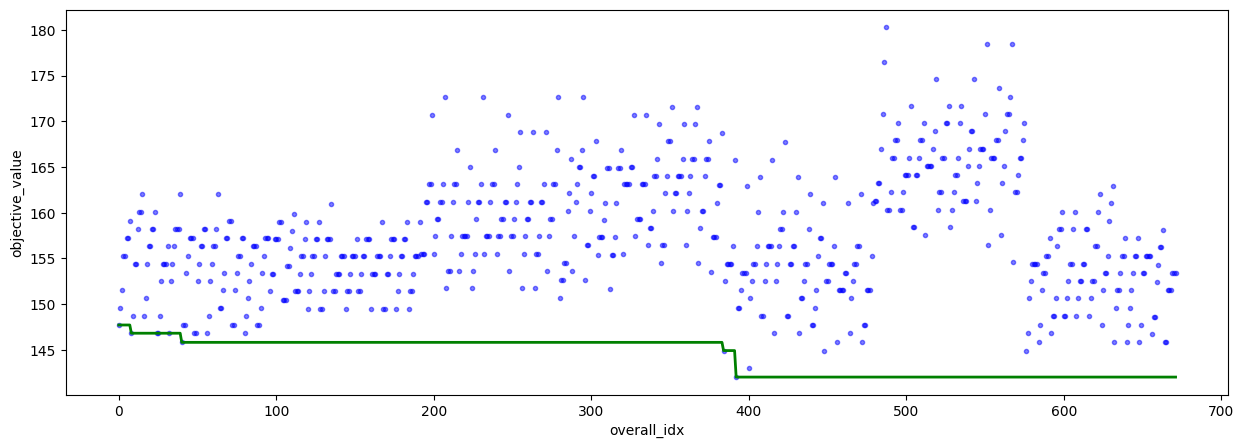

In [10]:
voxart.overall_progress_plot(df_results)

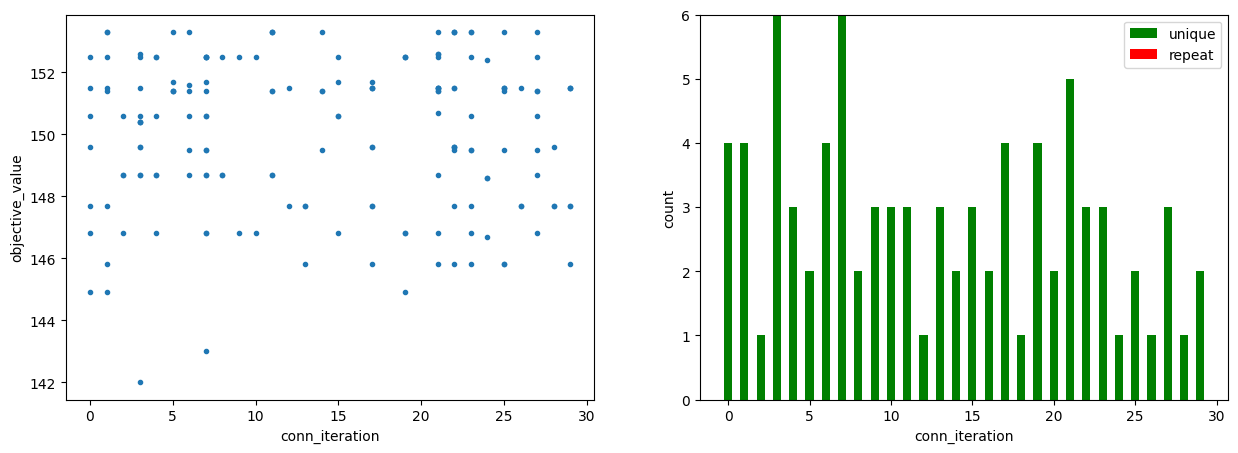

In [11]:
voxart.connector_iterations_plot(df_results)

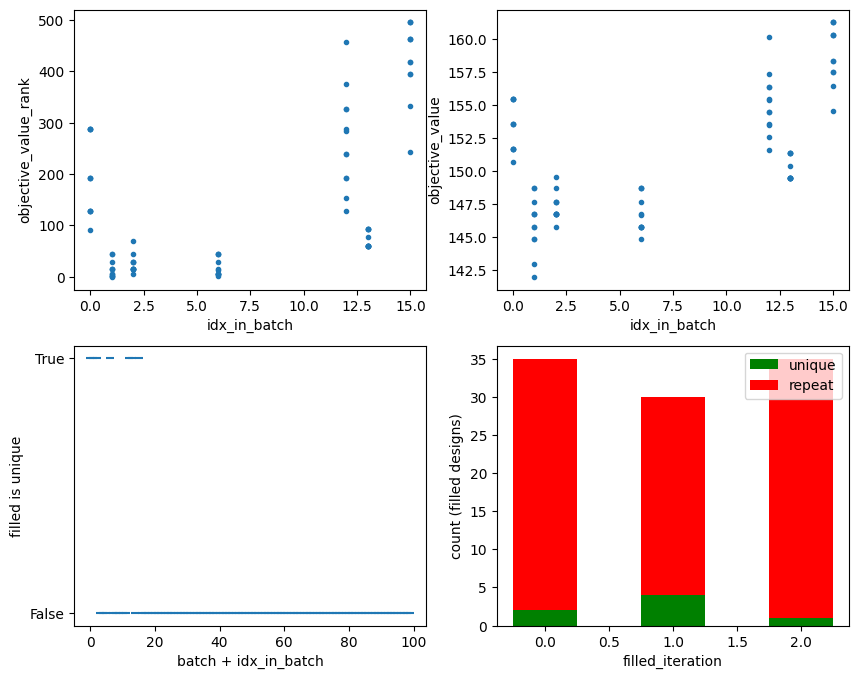

In [12]:
voxart.batch_plot(df_filled_results, df_results)

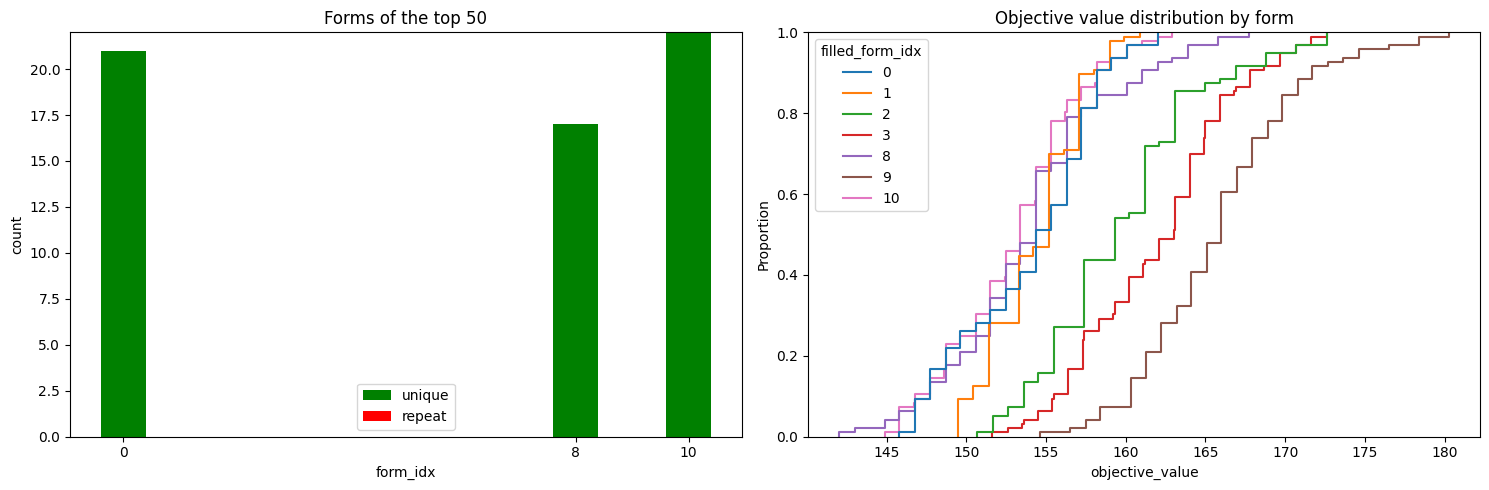

In [13]:
voxart.forms_plot(df_results)

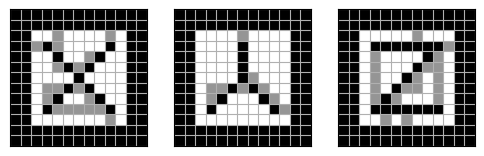

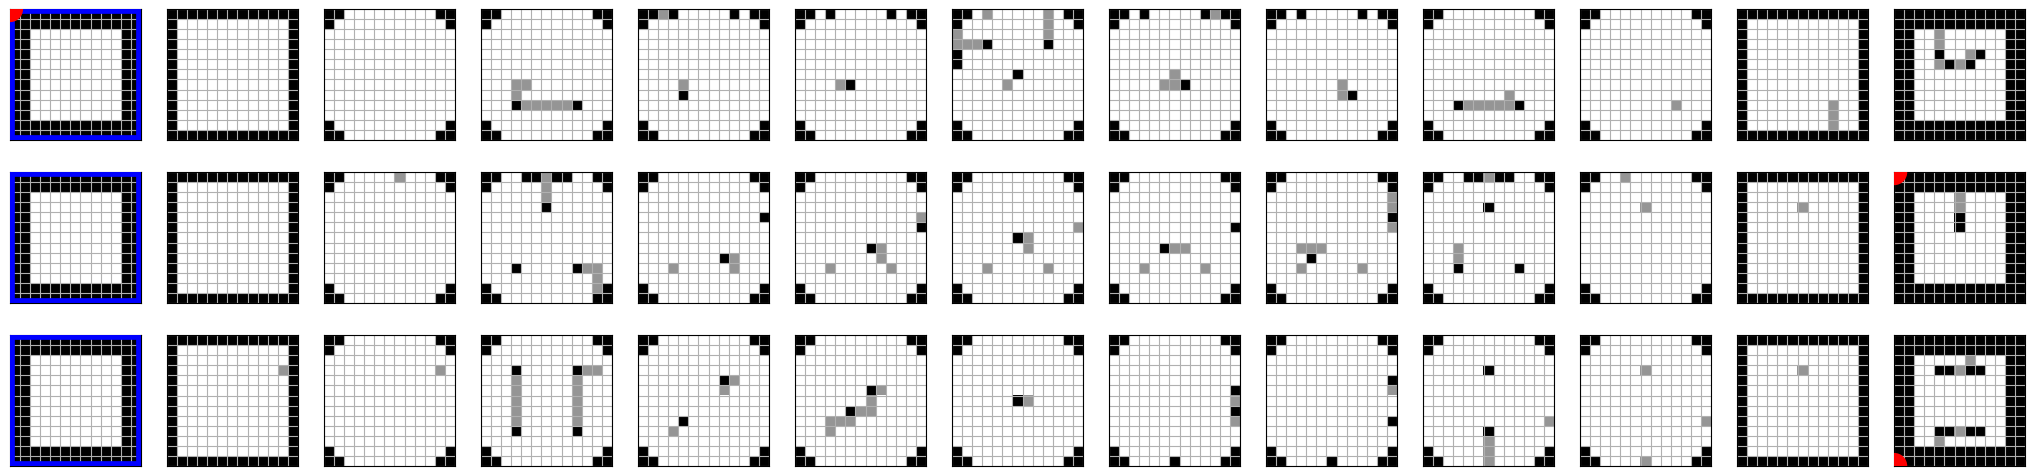

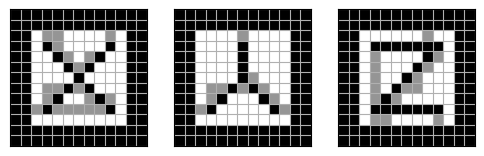

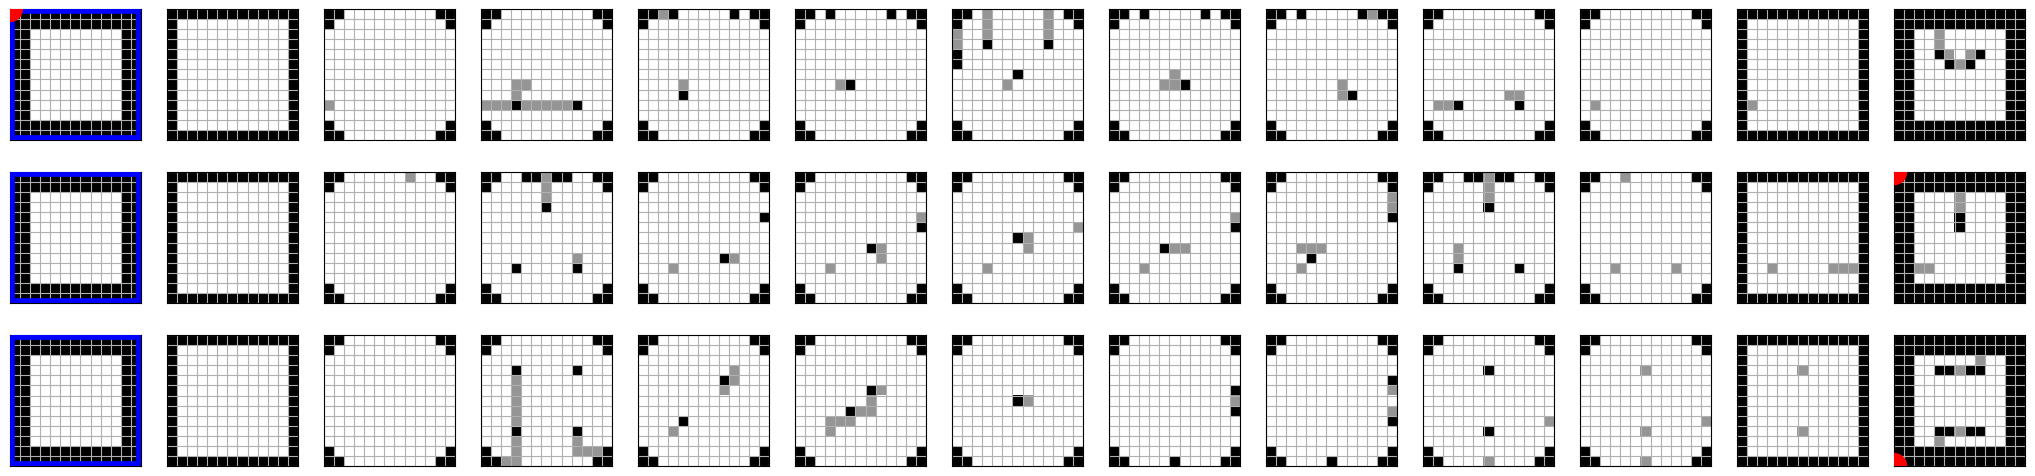

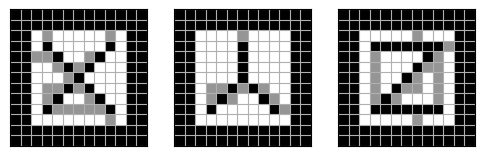

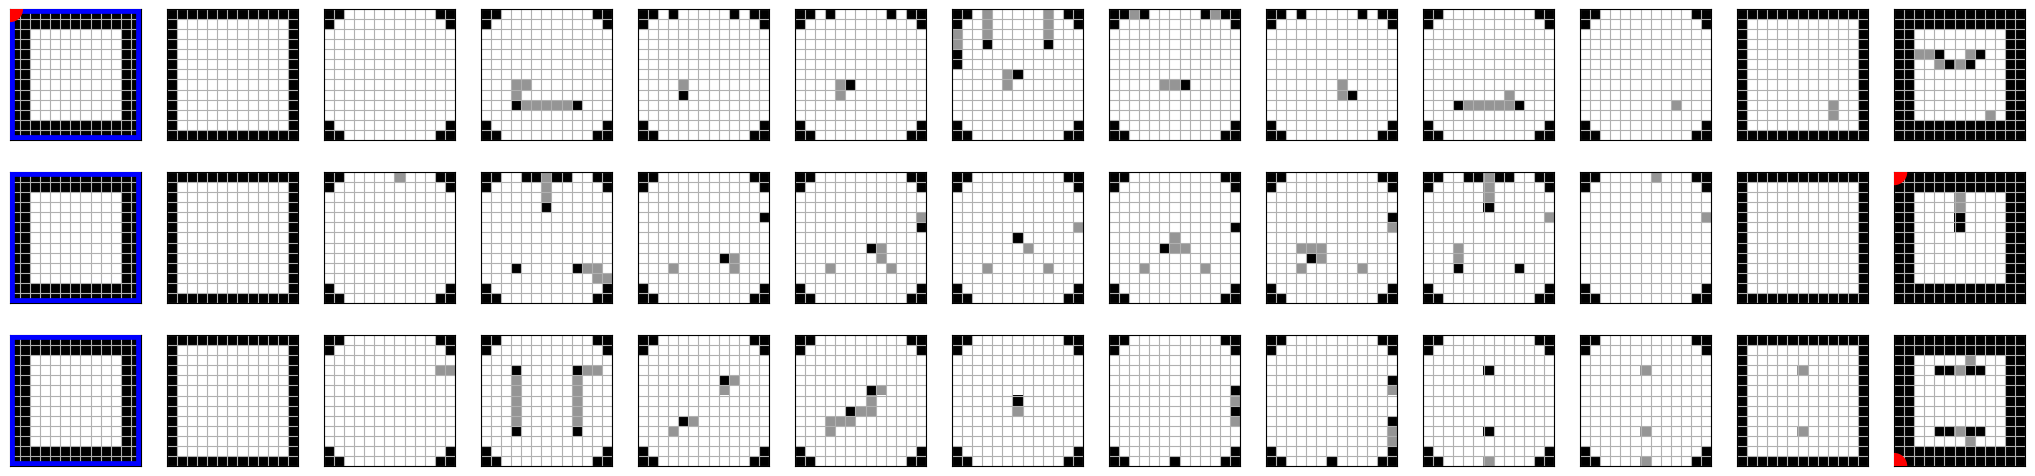

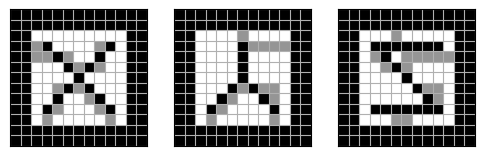

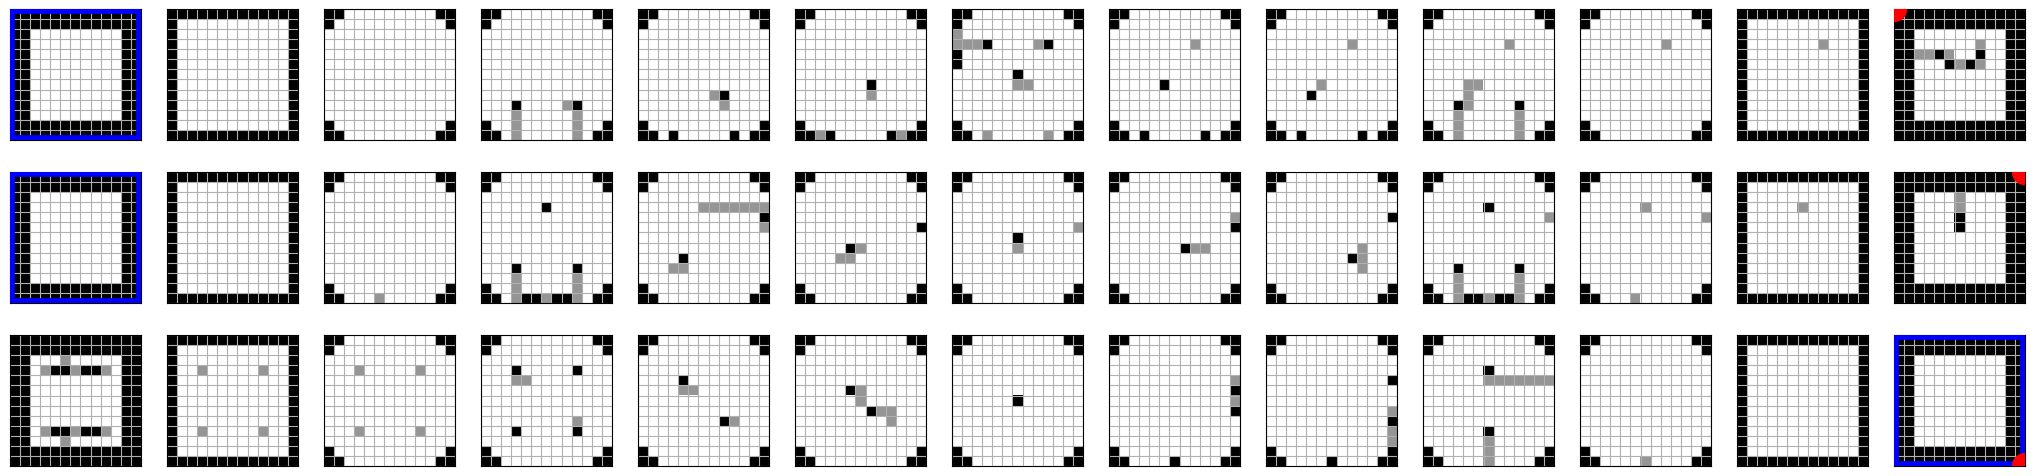

In [16]:
for _, design in results.best()[:4]:
    design.add_frame(1)
    display(design.projections_fig("visible"))
    display(design.slices_fig())

In [6]:
voxart.save_stl(design_xyz_conn, "/Users/priley/tmp/xyz_cube", connector_style="cube", separate_files=True)
voxart.save_stl(design_xyz_conn, "/Users/priley/tmp/xyz_strut", connector_style="strut", separate_files=False)

# PFR

In [23]:
goal_pfr = voxart.Goal.from_image(Image.open("../assets/pfr_13.png"))
goal_pfr.fig()
results_filled = voxart.search(goal_pfr, "random_clear_front", num_iterations=50, top_n=50)
label, design_pfr_conn = results_filled.best()[0]
print(label)

  0%|          | 0/64 [00:00<?, ?it/s]

(0, False, 1)


In [24]:
df_results_filled = results_filled.all_objective_values()

<AxesSubplot: xlabel='iteration', ylabel='objective_value'>

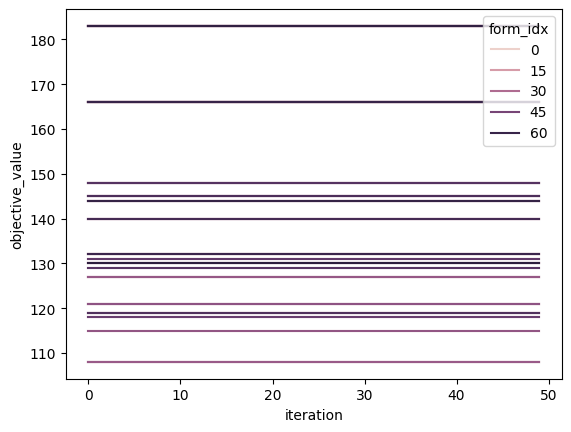

In [25]:
sns.lineplot(df_results_filled[~df_results_filled["is_starting"]], x="iteration", y="objective_value", hue="form_idx")

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_

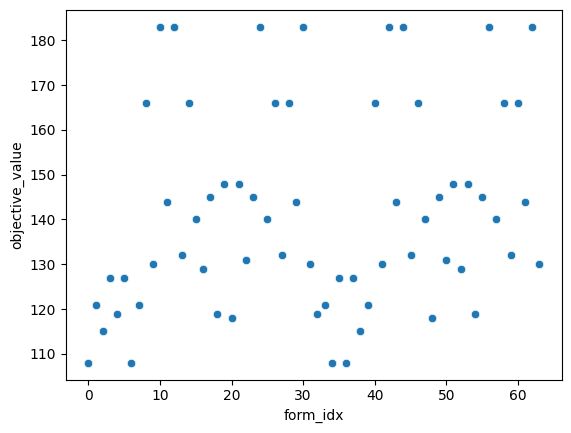

In [28]:
g = sns.scatterplot(data=df_results_filled[~df_results_filled["is_starting"]], x="form_idx", y="objective_value")
dir(g)

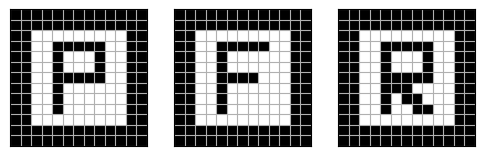

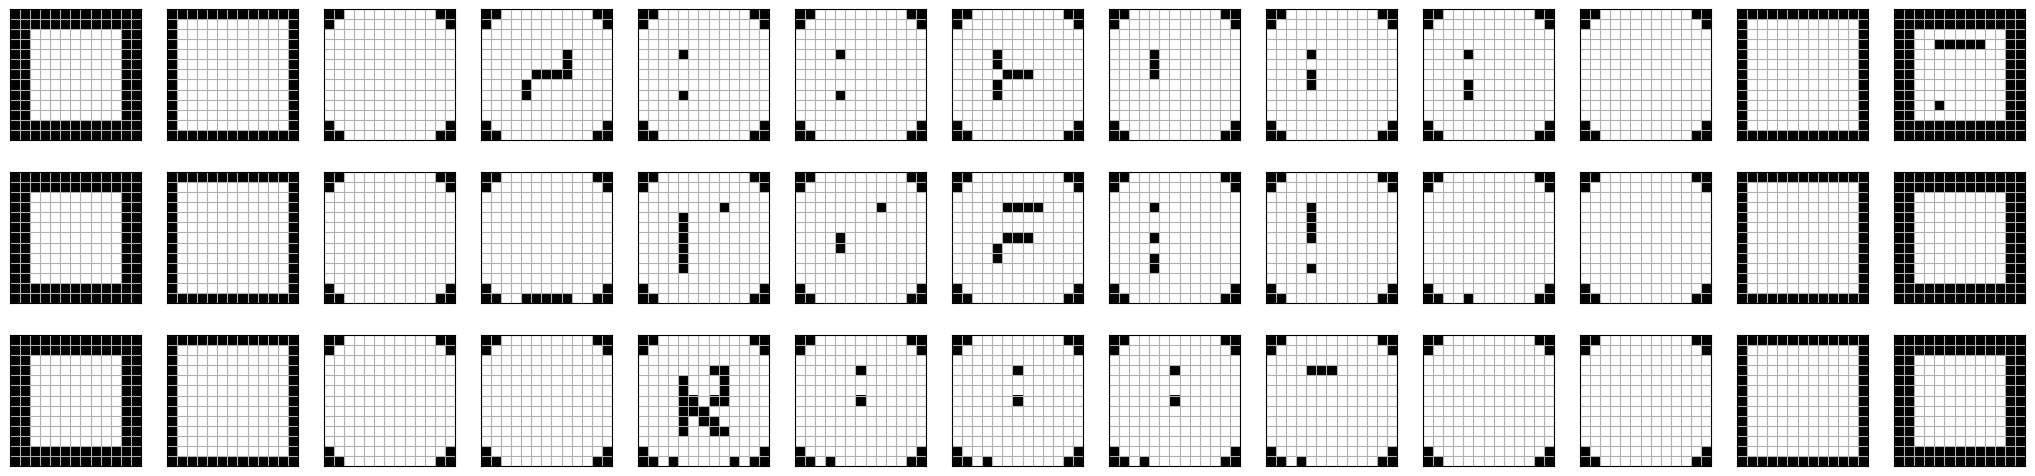

In [15]:
design_pfr_conn.add_frame(1)
display(design_pfr_conn.projections_fig())`
display(design_pfr_conn.slices_fig())